# Activity 1: Basics of Linear Algorithms

## Setup

As usual, we start with importing the necessary libraries. Note that, we are again using the
```regressiondemo.py``` file where it is used mainly for FIT1043 tutorials to ease the
understanding through illustration via code.


In [1]:
import numpy
import matplotlib.pyplot as pl
import regressiondemo as rd
from IPython.core.display import HTML
%matplotlib inline

In [19]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
div{
    text-align:justify;
}
</style>
""")


<div>Proceed to create a true function for comparison purposes. Note that this doesn't exist in
actual Data Analysis as if we know the true functions, we don't need to do the analysis. The
reason why we have created it is for illustration purposes on the concepts of bias and fit
using linear regression.</div>

In [3]:
# The "true" function of x with range fixed at [0,10]
def truefunc(x):
    return numpy.sin(x*2.0)*numpy.sqrt(x)/3.3

<div>Let's plot the true function for visualisation purposes. We firstly generate a set of x-values
using the function that is provided in the regressiondemo.py. Then based on the
x-values, we generate the y-values based on the true function. When we plot this, we would
expect the (x,y) points to be on the curve. (It is a rather smooth curve because we are using
quite a lot of points, if you are using only 20 or 30 points, the plot will not be smooth).

In [4]:
# Create 200 x-values using the regressiondemo.py function called makeX()
xts = rd.makeX(200)
print(type(xts))

<class 'numpy.ndarray'>


In [5]:
# Use the truefunc() to create the matching y-values that fit
# that true equation
yts = truefunc(xts)
print(yts)

[ 0.00158948  0.00227541  0.00323251  0.01350002  0.04884096  0.07097622
  0.08011732  0.12228458  0.15164642  0.18184624  0.19831252  0.24038926
  0.27970215  0.27998207  0.27978282  0.27878995  0.27440427  0.27036261
  0.26484936  0.25676475  0.25326204  0.23804609  0.21049754  0.19264517
  0.18017964  0.10790188  0.10116191  0.07443086  0.04535778  0.04376379
 -0.02219892 -0.04477519 -0.05093264 -0.16868492 -0.20568186 -0.25729534
 -0.27994636 -0.28844519 -0.31225045 -0.33492232 -0.40915156 -0.43527606
 -0.43712197 -0.46294263 -0.46311689 -0.46726965 -0.46771252 -0.46540707
 -0.45855881 -0.44463755 -0.44140491 -0.42972891 -0.41847414 -0.40019714
 -0.30019576 -0.23820255 -0.21698554 -0.21467805 -0.20918257 -0.16412973
 -0.15644863 -0.13743685 -0.09283415 -0.07922998  0.13560762  0.15350916
  0.29622246  0.30543043  0.31049314  0.35714792  0.36453517  0.3796028
  0.42518332  0.44967439  0.49465444  0.53842281  0.56293981  0.57395122
  0.57545198  0.58953373  0.59148119  0.59846376  0.

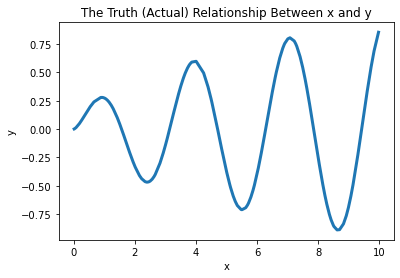

In [6]:
pl.plot(xts, yts, label = 'truth', linewidth=3.0)
pl.title("The Truth (Actual) Relationship Between x and y")
pl.ylabel('y')
pl.xlabel('x')
pl.show()

<div>Now that we have the basis of the truth for us to illustrate some concepts. Let's create
(simulate) a set of 30 points that would reflect an actual collection of data, which would not
be exactly matching the true function. Remember that the x-values are the independent
variables and the y-values are the dependent variables. Hence this next part is to simulate
the y-values (with noise).

In [7]:
# Don't make more than 100 points for this demo
points = 30

# The regressiondemo.py provides settings for noise level
# creation using standard deviation as the input
rd.setSigma(0.2)

# Let's create some (x,y) points, x being the independent
# variable. The difference from the earlier makeX is that
# we now use the 'points' variable.
x = rd.makeX(points)

# y-values are based on the truefunc(x) but we want to add
# some noise to it.
y = rd.addNoise(truefunc(x))

Practise 1:
Scatter plot the simulated data collection. As an additional mini challenge, plot the points
using the symbol 'x' instead of dots. Your plot should look like below

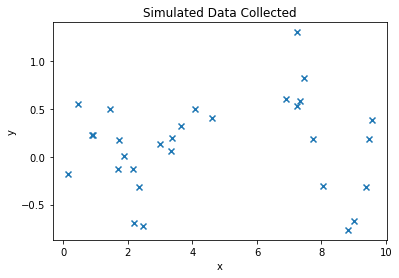

In [8]:
pl.scatter(x, y, marker = "x")
pl.ylabel("y")
pl.xlabel("x")
pl.title("Simulated Data Collected")
pl.show()

<div>We now have the true relationship between x and y, as well as a set of simulated data that
were collected. The activity now is to fit different orders of polynomials to the regression to
find the best fit.</div>

## Step 1.1: Fitting different orders of polynomials

<div>We will try regression for a range of orders, or different degrees of the polynomial. This
means generating a set of orders. We do this by starting with a maximum order that is
slightly less than the number of points and then halve it until the order shrinks to 3. We
repeat the above code for the different orders.

Because we will be plotting many lines, we want to firstly make it a larger plotting area,
called the canvas

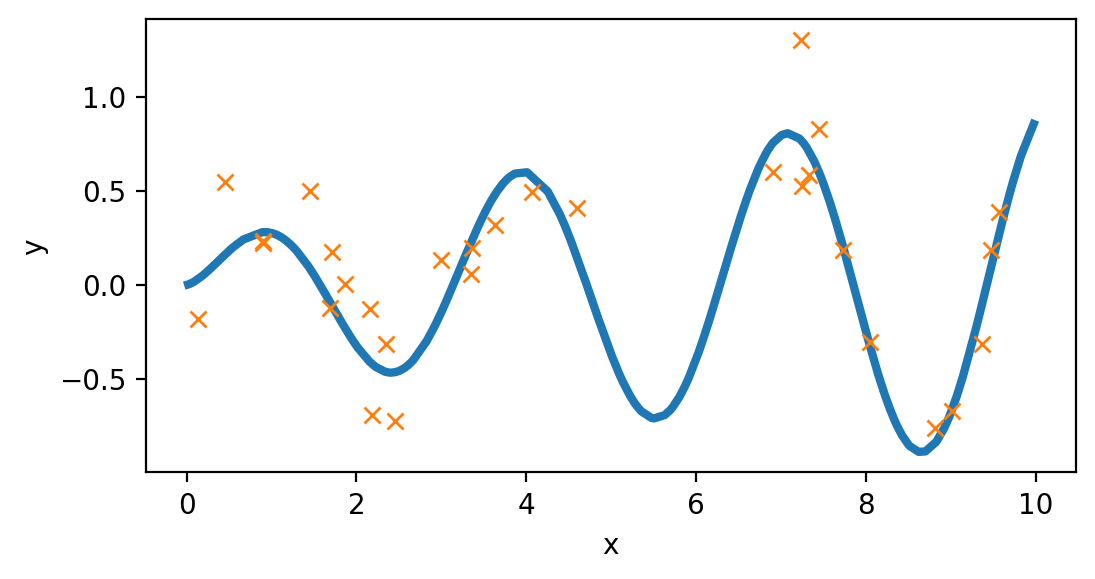

In [9]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=(6, 3), dpi=200)

# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=3.0)

# Plot the simulated collected data
pl.plot(x, y, 'x')
pl.ylabel('y')
pl.xlabel('x')
pl.show()

In [10]:
# Build a set of polynomial orders to use to fit
# Note that the regressiondemo.py has a function makeOrders()
# that takes in the number of points we have and create
# a set of orders (polynomial orders in this case)
orders = rd.makeOrders(points)
print('Fitting polynomials of orders = ', orders)

Fitting polynomials of orders =  [3, 6, 12, 25]


Practise 2:
What’s the output of the print statement?

Tf do u mean it's literally there. ```Fitting polynomials of orders =  [3, 6, 12, 25]```

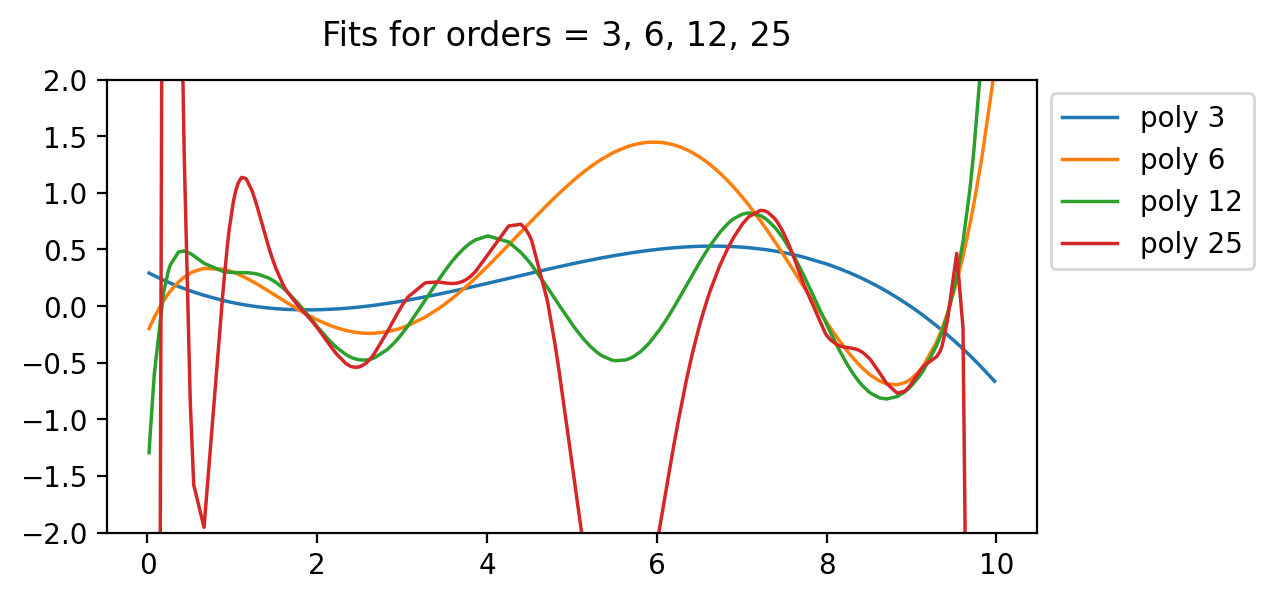

In [11]:
# Make a larger canvas size (figures in inches)
pl.figure(figsize=(6, 3), dpi=200)

# If fitting goes a bit wild, need to constrain what y's are plotted
# Uncomment the following line and re-run this cell
pl.ylim(-2, 2)
# We now create a linear regression for each of the order

for order in orders:
# Using the linear regression function in regressiondemo.py.
# Again, note that this is for illustration purposes, for any
# exercises, assignments, assessment, this is not to be used.
    ys = rd.linReg(x, y, xts, order)

    # Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1.25)

    # We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

Let's put all of them together

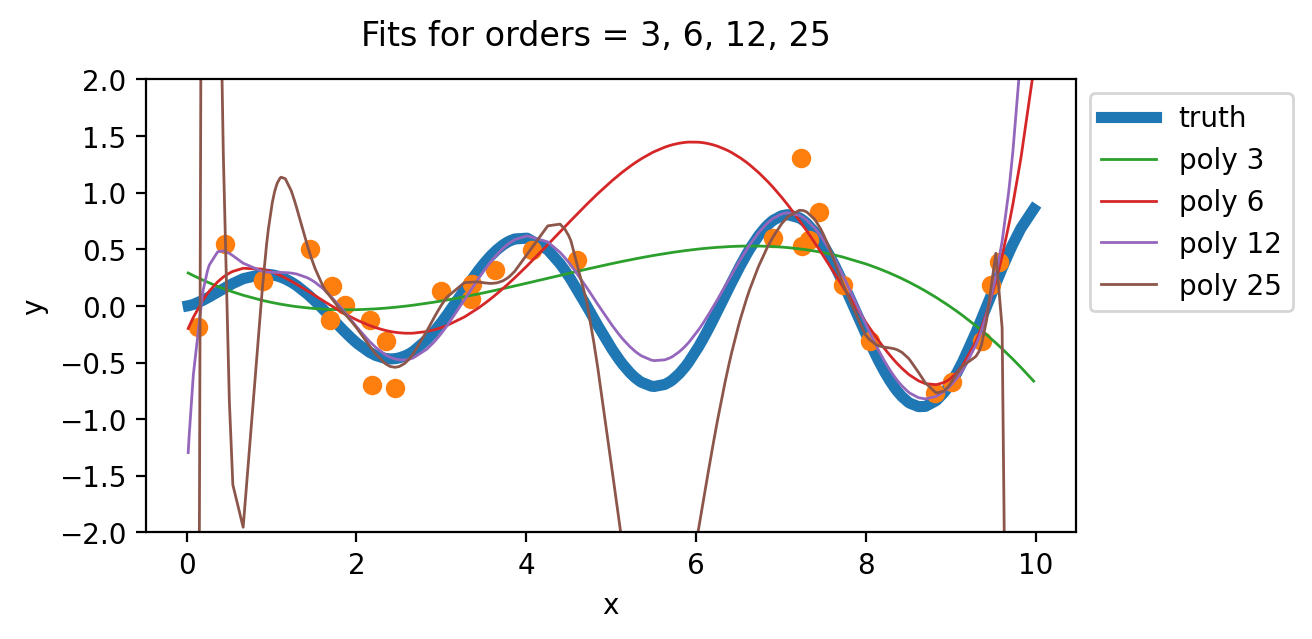

In [12]:
# Make a larger canvas size
pl.figure(figsize=(6, 3), dpi=200)
# Plot the true relationship between x and y
pl.plot(xts, yts, label = 'truth', linewidth=4) # default is green line?
# Plot the simulated collected data
pl.plot(x, y, 'o')
pl.ylabel('y')
pl.xlabel('x')

# Build a set of polynomial orders to use to fit
orders = rd.makeOrders(points)
pl.ylim(-2, 2)
for order in orders:
    # Using the linear regression function in regressiondemo.py.
    ys = rd.linReg(x, y, xts, order)
    # Plot fitted curve
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
    # We want to have the legend for the lines
    pl.legend(bbox_to_anchor=(1, 1))
    pl.suptitle('Fits for orders = '+ ', '.join(map(str, orders)) )

Practise 3:<br>
    ● What do you see from the plots with the different polynomial dimensions (orders)?<br><br>
    I see many things such as, more turning points, plotted, indeed more closely to the truth values. more convulated.<br><br>
    ● How well do higher dimensional polynomials work?<br><br>
    The predictive model seems to breakdown at extremely small/large x values for poly 25, but we will have a more quantitative measure of what order is better using MSE. <br><br>
    ● Which order seems to give the best fit?
    Not mathematically speaking, but visually. <br><br>Poly 12 seems to work best. As it follows the truth value the most closely, hence very likely to have a small MSE.

# Help your eyes! 
Eyes too blind to see the small figsize? Read THIS article!<br>
https://stackoverflow.com/questions/47633546/relationship-between-dpi-and-figure-size

## Step 1.2: How well can linear regression fit the "truth" anyway?

<p style = "text-align: justify">In order to understand how well any particular polynomial order can do, we can try generating a large number of points with little noise and see how well a polynomial of that order fits the (near-enough to) "infinite" sample. Note in practice we can rarely do this because we rarely have an infinite sample of data; nor do we know the "truth". So this is a "what if" scenario used to test out what happens with models of different orders. The code below is not a step by step tutorial, as we have done it above.</p>

Fitting polynomials of orders =  [3, 6, 12, 25]


Text(0.5, 0.98, 'Best possible fits')

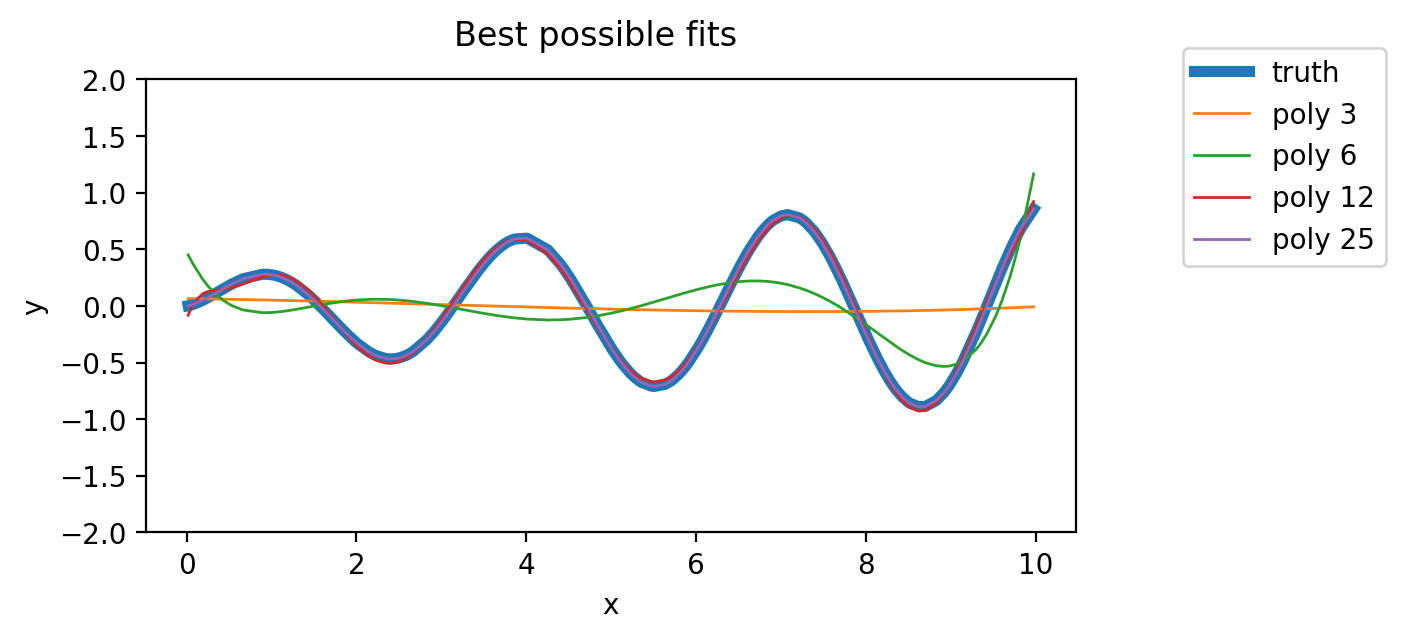

In [13]:
# Plot the truth
pl.figure(figsize=(6, 3), dpi=200)
pl.plot(xts, yts, label = 'truth', linewidth = 4)
pl.ylabel('y')
pl.xlabel('x')

print ("Fitting polynomials of orders = ", orders)
for order in orders:
    ys = rd.bestLinReg(truefunc,xts,order)
    pl.plot(xts, ys, label = 'poly ' + str(order), linewidth = 1)
    
pl.ylim(-2,2)

pl.legend(bbox_to_anchor=(1.1, 1.1))
pl.suptitle('Best possible fits')

<div>So these curves represent the (near) best fits one can do to the "truth" with different orders
of polynomials. These best fits are in the sense of "least squares", the least squared error
averaged over the x-range. When fitting to finite samples, one will get more or less close to
these best fits, the less data one has then generally the worse the fit will be.

<br>
<br>
<div>So you should see that the higher orders of polynomials, the best “fit” matches the true
function. There is an order of polynomials where the best possible fit becomes
indistinguishable to the eye on these plots. However, consider again the "fits of different
orders" plot. For the higher orders, these fits (with a smallish amount of data) are not even
close to the best possible fit.

## Model Bias

This leads to some important concepts in statistical learning:

<div><b>Model family:</b> a model family is a class of models characterised by some higher order
parameters, usually called hyper-parameters. In the 2-D linear regressions here, the
hyper-parameter is the order. This leads to particular members of the family, 4-th order linear
regression in 2-D, 10-th order linear regression in 2-D, etc. To instantiate one of these to get
a particular model instance or function, we need to give the coefficients to it. So an instance
of 4-th order linear regression in 2-D would be fully instantiated with the 5 coefficients (1, 1,
0.5, 0.2, 0.1), one for the constant term and 4 for the powers.

<div><b>Bias:</b> how close can a particular member of the model family fit a particular "truth". So for the
curve sin(x) on some range [0,5], how close can one get with a 4-th order polynomial or a
10-th order polynomial? We plotted the best fits in the previous cell.


<b>Large bias models:</b> so small order polynomials can never fit the sin(x) function very well.
These members of the linear regression family are said to have large bias.

<b>Small bias models:</b> so large order polynomials can usually fit the sin(x) function much
better. These members of the linear regression family are said to have small bias.

In general, simple models will have a large bias, and complex models will have a small
bias.

Practise 4: Question <br>
● Do we always go with the most complex models? In this case the highest possible
polynomial?

## Step 1.3: The effect of different samples

<div>Now another aspect of simple and complex models is how differently they behave with
different data sets. We saw a glimmer of this in an earlier plot, but here we will develop the
comparison more. Again, it's important to keep in mind we cannot do this in practice, since
usually we have one finite sample. We do it here as part of a "what if" scenario in the unlikely
situation where the "truth" is given.

So let's try a bunch of different samples of the same size, and see how well the different
orders of polynomials do. For this, we'll just use the largest four orders of the set of orders
above.

<ipython-input-18-c20f4e1207e5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(2,2,sp)
<ipython-input-18-c20f4e1207e5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pl.subplot(2,2,sp)
<ipython-input-18-c20f4e1207e5>:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and re

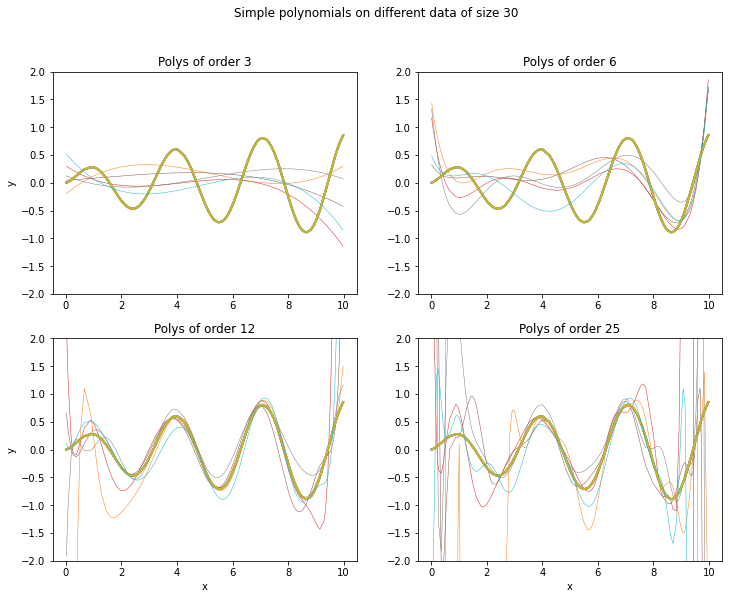

In [18]:
points = 30
orders = rd.makeOrders(points)

# This activity is also to show how you can plot a few graphs
# in one plot. Here we do a 2x2 plot, so need four orders to fit
fourorders = orders[-4:]

setcount = 6
pl.figure(figsize=[12,9])
pl.suptitle('Simple polynomials on different data of size '+ str(points))
# Goes through an iteration to plot multiple graphs into one

# Goes through an iteration to plot multiple graphs into one
for i in range(0, setcount-1):
    # Generate a sample for each graph
    xb = rd.makeX(points)
    yb = rd.addNoise(truefunc(xb))
    # To obtain the position in the subplot
    sp = 1;
    for order in fourorders:
        pl.subplot(2,2,sp)
        sp += 1
        # plot the truth
        pl.plot(xts, yts, linewidth = 2) # default is green line?
        # Just for the axes to be labelled
        if sp>3:
            pl.xlabel('x')
        if sp%2==0:
            pl.ylabel('y')
        ys = rd.linReg(xb,yb,xts,order)
        pl.title('Polys of order ' + str(order))
        # Plot fitted curve
        pl.plot(xts, ys, linewidth = 0.5 )
        # The y range for the plot has to be altered depending on the data
        pl.ylim(-2,2)